# ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

# Dataset

## Yahoo Finance

* Yahoo provides an API that can be easily integrated with python to return a dataframe containing Daily prices for bitcoin since 2014.
> The good thing about using such dataset is that very little preparation needs to be done:
>* there are no missing values
>* the date is already indexed. 


In [1]:
# pip install yfinance
# Yahoo API to fetch up to date bitcoin data from 2014 until present (DAILY)
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima

# Data Import and Exploration

In [2]:
df = yf.download('BTC-USD')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-03-24,42886.652344,44131.855469,42726.164062,43960.933594,43960.933594,31042992291
2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2750 entries, 2014-09-17 to 2022-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2750 non-null   float64
 1   High       2750 non-null   float64
 2   Low        2750 non-null   float64
 3   Close      2750 non-null   float64
 4   Adj Close  2750 non-null   float64
 5   Volume     2750 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.4 KB


In [4]:
df['Close'].describe()

count     2750.000000
mean     11720.503200
std      16360.975535
min        178.102997
25%        609.364517
50%       6378.314453
75%      10766.162842
max      67566.828125
Name: Close, dtype: float64

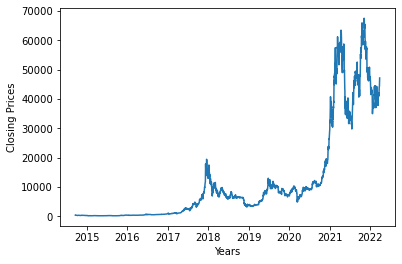

In [5]:
plt.plot(df.index, df['Close'])

plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.show()

# AUTO ARIMA

An ARIMA model is characterized by 3 terms (p, d, q):

p is the order of the AR term

d is the number of differencing required to make the time series stationary

q is the order of the MA term

## We can use auto_arima to help finding the values that best fits p,d and q

In [6]:
model = auto_arima(
    df['Adj Close'],
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44489.156, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44486.602, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44487.170, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44487.162, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44485.876, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.325 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2750
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -22241.938
Date:                Mon, 28 Mar 2022   AIC                          44485.876
Time:                        13:57:48   BIC                          44491.795
Sample:                             0   HQIC                         44488.015
                               - 2750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.238e+05   5247.533    118.876      0.000    6.14e+05    6.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):             39522.60
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):            5493.72   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 0,1,0 are the recommended parameters

==Ask Muhammad about next topics: ==
- Random Walk?
- Uncorrelated random variables?
- white noise?

> Now we need to split the dataset in training and testing lists
>* first we find which row corresponds to 90% of the entries
>* training_data takes the first 90% of the Closing Prices
>* Testing_data contains the last 10% of Closing prices

In [7]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Close'])
testing_data = list(df[to_row:]['Close'])

# Plot to graphically represents dataset division

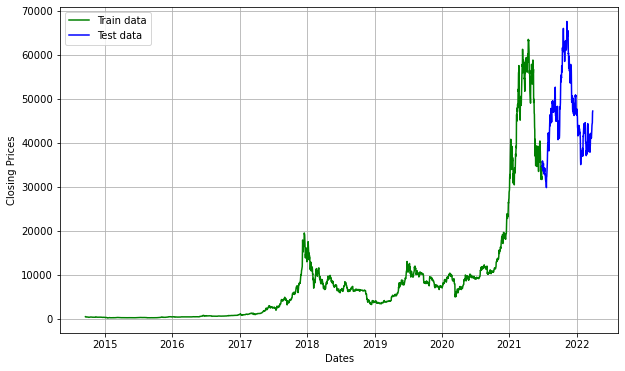

In [8]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'green', label = 'Training set')
plt.plot(df[to_row:]['Close'], 'blue', label = 'Testing set')
plt.legend()

Empty list is needed in order to store the daily prediction for our testing set as we are going to iterate day by day from where we split the dataset

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

# Fit the model with parameters from autoarima (0,1,0)

for loop to run iterations and update data through all observations in testing dataset to improve accuracy

In [10]:
for i in range(n_test_obser):
    # model parameters fitting
    model = ARIMA(training_data, order = (0,1,0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    # yhat = represents the predicted value
    yhat = list(output[0])[0]
    # append the prediction
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    
    #update the training set for next iterations
    training_data.append(actual_test_value)
    


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2748
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -22233.602
Method:                           css   S.D. of innovations            789.888
Date:                Mon, 28 Mar 2022   AIC                          44471.203
Time:                        13:57:50   BIC                          44483.041
Sample:                             1   HQIC                         44475.480
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8716     15.068      1.120      0.263     -12.661      46.404


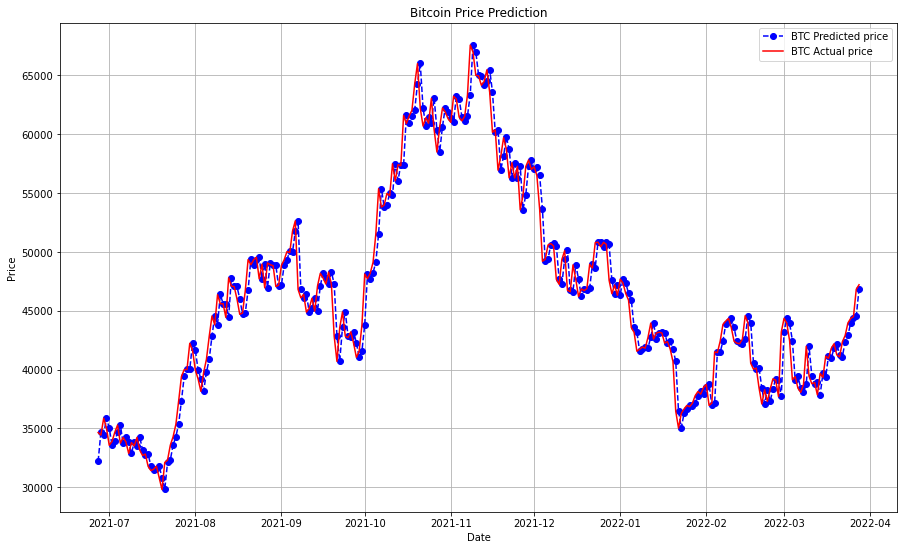

In [12]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# MAPE

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics.

In [14]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' +str(mape))

MAPE: 0.02566711021837251


MAPE = 2.5% error. which implies almost 98% accuracy.